# Mengambil data dari csv

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from regression import multipleLinearRegression, koefRegression,kualitasRegresi
pd.set_option('display.max_rows', None)
# nampilin semua row
pd.set_option('display.max_columns', None)
# nampilin semua kolom
pd.set_option('display.width', None)
pd.set_option('mode.chained_assignment', None)

data = pd.read_csv('car_dataset.csv', delimiter=",")

# Mengubah beberapa data menjadi numeric

In [28]:
# convert to numeric
data[["Year", "Present_Price", "Selling_Price", "Kms_Driven","Owner"]] = data[[
    "Year", "Present_Price", "Selling_Price", "Kms_Driven","Owner"]].apply(pd.to_numeric)

# Menambahkan beberapa atribut turunan agar bisa diolah

In [29]:
# insert derived attr (age) terhitung dari tahun sekarang(tahun data dikeluarkan)-tahun mobil
data.insert(0, "Age", 2018-data[["Year"]])
# insert derived attr (Kms_Driven/2000)
data.insert(0, "Kms_Driven/2000", data[["Kms_Driven"]]/2000)
# insert derived attribut (fuel)
# Petrol -> 0
# Diesel -> 1
# CNG -> 2
data["fuel"]=pd.factorize(data.Fuel_Type)[0]
# insert derived attr (seller)
# Dealer -> 0
# Individual -> 1
data["seller"]=pd.factorize(data.Seller_Type)[0]
# insert derived attr (trans)
# Manual -> 0
# Automatic -> 1
data["trans"]=pd.factorize(data.Transmission)[0]


# Split data 80% train data , 20% test data

In [30]:
y = data[['Selling_Price']]
x = data[['Age', 'Present_Price', 'Kms_Driven/2000','fuel','seller','trans','Owner']]

# train 80% , test 20% of data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Mengolah Data Frame yang ada menjadi array yang bisa diolah

In [31]:
# convert data x dan y menjadi matriks yang bisa diolah
y_train_matrix = y_train.to_numpy(dtype='float')
y_train_matrix = np.reshape(y_train_matrix, (-1, 1))
y_test_matrix = y_test.to_numpy(dtype='float')
x_train_matrix = x_train.to_numpy(dtype='float')
x_test_matrix = x_test.to_numpy(dtype='float')
# add 1 in column 0 buat x_train
x_train_matrix_new = np.insert(x_train_matrix, 0, values=1, axis=1)
x_test_matrix_new = np.insert(x_test_matrix, 0, values=1, axis=1)
# koefisien buat garis regresi
koef = koefRegression(x_train_matrix_new, y_train_matrix)


# Akurasi Algoritma

In [32]:
# insert Selling_Price_Reg sebagai hasil dari perhitungan regresi linear
y_reg=[]
for i in range(len(x_test_matrix_new)):
    # memanggil fungsi regresi
    val_reg = multipleLinearRegression([x_test_matrix_new[i]], x_train_matrix_new, y_train_matrix)[0][0]
    # insert val_reg ke array y_reg
    y_reg.append(val_reg)
    
y_test['Selling_Price_Reg']=y_reg

y_test

,Selling_Price,Selling_Price_Reg
175,0.38,-0.753790
234,5.50,4.423178
130,0.75,1.956622
65,4.75,5.959403
231,9.25,6.762651
96,20.75,16.585275
127,0.75,1.559092
6,6.75,5.405357
159,0.45,3.530316
63,23.50,20.725737


# Menghitung dan Menganalisis Kualitas Regresi

In [33]:
# yreal -> y_test_matrix
# yestimate -> y_reg
koefDeterminasi = kualitasRegresi(y_test_matrix,y_reg)
koefDeterminasi
# Jika koefDeterminasi mendekati 1 maka regresi nyaris sempurna
# Jika koefDeterminasi = 0 maka garis regresi tidak fit

0.8604766593498236

# x=age dan y=selling price

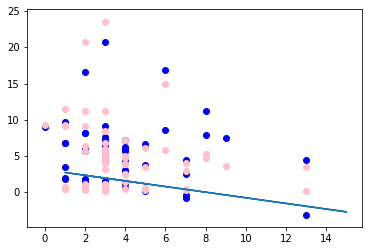

In [34]:
# plotting sesuai perhitungan garis regresi
for i in range(len(x_test_matrix_new)):
    plt.scatter(x_test_matrix[i][0], (multipleLinearRegression(
        [x_test_matrix_new[i]], x_train_matrix_new, y_train_matrix))[0][0], c="Blue")
# plotting sesuai data yang ada
plt.scatter(x_test[['Age']], y_test[['Selling_Price']], c='pink')
# garis regresi untuk x=age
yval1 = koef[0][0]+koef[1][0]*x_train[['Age']]
plt.plot(x_train[['Age']], yval1, linestyle='-')
plt.show()

# x=present price dan y=selling price

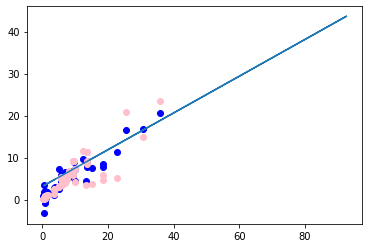

In [35]:
# plotting sesuai perhitungan garis regresi
for i in range(len(x_test_matrix_new)):
    plt.scatter(x_test_matrix[i][1], (multipleLinearRegression(
        [x_test_matrix_new[i]], x_train_matrix_new, y_train_matrix))[0][0], c="Blue")
# plotting sesuai data yang ada
plt.scatter(x_test[['Present_Price']], y_test[['Selling_Price']], c='pink')
# garis regresi untuk x=present_price
yval = koef[0][0]+koef[2][0]*x_train[['Present_Price']]
plt.plot(x_train[['Present_Price']], yval, linestyle='-')
plt.show()

# x=Kms_Driven/2000 dan y=selling price

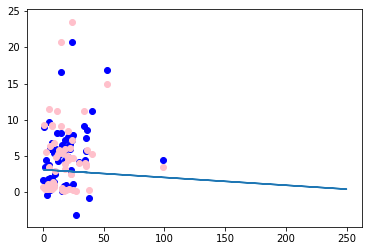

In [36]:
# plotting sesuai perhitungan garis regresi
for i in range(len(x_test_matrix_new)):
    plt.scatter(x_test_matrix[i][2], (multipleLinearRegression(
        [x_test_matrix_new[i]], x_train_matrix_new, y_train_matrix))[0][0], c="Blue")
# plotting sesuai data yang ada
plt.scatter(x_test[['Kms_Driven/2000']], y_test[['Selling_Price']], c='pink')
# garis regresi untuk x=Kms_Driven/2000
yval2 = koef[0][0]+koef[3][0]*x_train[['Kms_Driven/2000']]
plt.plot(x_train[['Kms_Driven/2000']], yval2, linestyle='-')
plt.show()

# x=fuel dan y=selling price

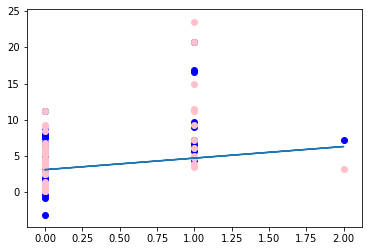

In [37]:
# plotting sesuai perhitungan garis regresi
for i in range(len(x_test_matrix_new)):
    plt.scatter(x_test_matrix[i][3], (multipleLinearRegression(
        [x_test_matrix_new[i]], x_train_matrix_new, y_train_matrix))[0][0], c="Blue")
# plotting sesuai data yang ada
plt.scatter(x_test[['fuel']], y_test[['Selling_Price']], c='pink')
# garis regresi untuk x=fuel
yval3 = koef[0][0]+koef[4][0]*x_train[['fuel']]
plt.plot(x_train[['fuel']], yval3, linestyle='-')
plt.show()

# x=seller dan y=selling price

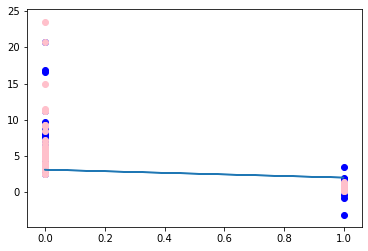

In [38]:
# plotting sesuai perhitungan garis regresi
for i in range(len(x_test_matrix_new)):
    plt.scatter(x_test_matrix[i][4], (multipleLinearRegression(
        [x_test_matrix_new[i]], x_train_matrix_new, y_train_matrix))[0][0], c="Blue")
# plotting sesuai data yang ada
plt.scatter(x_test[['seller']], y_test[['Selling_Price']], c='pink')
# garis regresi untuk x=seller
yval3 = koef[0][0]+koef[5][0]*x_train[['seller']]
plt.plot(x_train[['seller']], yval3, linestyle='-')
plt.show()

# x=trans dan y=selling price

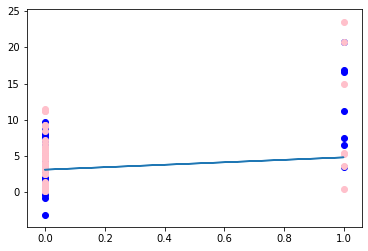

In [39]:
# plotting sesuai perhitungan garis regresi
for i in range(len(x_test_matrix_new)):
    plt.scatter(x_test_matrix[i][5], (multipleLinearRegression(
        [x_test_matrix_new[i]], x_train_matrix_new, y_train_matrix))[0][0], c="Blue")
# plotting sesuai data yang ada
plt.scatter(x_test[['trans']], y_test[['Selling_Price']], c='pink')
# garis regresi untuk x=trans
yval3 = koef[0][0]+koef[6][0]*x_train[['trans']]
plt.plot(x_train[['trans']], yval3, linestyle='-')
plt.show()

# x=Owner dan y=selling price

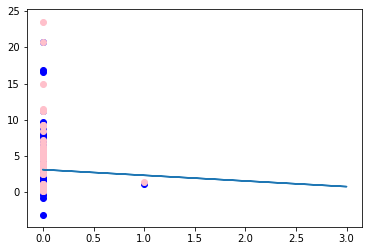

In [40]:
# plotting sesuai perhitungan garis regresi
for i in range(len(x_test_matrix_new)):
    plt.scatter(x_test_matrix[i][6], (multipleLinearRegression(
        [x_test_matrix_new[i]], x_train_matrix_new, y_train_matrix))[0][0], c="Blue")
# plotting sesuai data yang ada
plt.scatter(x_test[['Owner']], y_test[['Selling_Price']], c='pink')
# garis regresi untuk x=Owner
yval3 = koef[0][0]+koef[7][0]*x_train[['Owner']]
plt.plot(x_train[['Owner']], yval3, linestyle='-')
plt.show()